In [1]:
import time
import datetime
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.gridspec as mpl_gs
import matplotlib.cm as cm
import matplotlib.dates as mdates
from matplotlib import rcParams
rcParams.update({'font.size': 16,'lines.linewidth':2})

from siriuspy.clientarch import ClientArchiver
from siriuspy.sofb import SOFB, EpicsCorrectors, EpicsMatrix, EpicsOrbit

In [2]:
client = ClientArchiver()
client.login('fernando.sa', 'boo500mev')

urllib3 InsecureRequestWarning disabled!


True

In [3]:
corrs = EpicsCorrectors('BO')
matrix = EpicsMatrix('BO')
orbit = EpicsOrbit('BO')
sofb = SOFB('BO', matrix=matrix, orbit=orbit, correctors=corrs)

ERROR:root:Failed to get value from BO-01U:PS-CH
ERROR:root:Failed to get value from BO-03U:PS-CH
ERROR:root:Failed to get value from BO-05U:PS-CH
ERROR:root:Failed to get value from BO-07U:PS-CH
ERROR:root:Failed to get value from BO-09U:PS-CH
ERROR:root:Failed to get value from BO-11U:PS-CH
ERROR:root:Failed to get value from BO-13U:PS-CH
ERROR:root:Failed to get value from BO-15U:PS-CH
ERROR:root:Failed to get value from BO-17U:PS-CH
ERROR:root:Failed to get value from BO-19U:PS-CH
ERROR:root:Failed to get value from BO-21U:PS-CH
ERROR:root:Failed to get value from BO-23U:PS-CH
ERROR:root:Failed to get value from BO-25U:PS-CH
ERROR:root:Failed to get value from BO-27U:PS-CH
ERROR:root:Failed to get value from BO-29U:PS-CH
ERROR:root:Failed to get value from BO-31U:PS-CH
ERROR:root:Failed to get value from BO-33U:PS-CH
ERROR:root:Failed to get value from BO-35U:PS-CH
ERROR:root:Failed to get value from BO-37U:PS-CH
ERROR:root:Failed to get value from BO-39U:PS-CH
ERROR:root:Failed to

In [4]:
sofb.orbit.set_orbit_mode(sofb.csorb.SOFBMode.MultiTurn)

True

In [5]:
sofb.orbit.get_orbit()

array([-2245.50764347,   486.75775375,  5478.65525831,  1837.54291975,
       -3262.87931053, -2639.64566498, -3782.10622634, -3195.80388577,
        3951.61704914, -6219.23436689, -4722.89038874,  3946.99156967,
       -5085.6192398 , -2704.09386614,  6888.28916977,  1743.18193772,
        -923.01236487,   426.67862906,  1059.58489207,  -220.81447491,
        4294.33685381,  -927.35455502,  4525.50406664,  4214.59556289,
        1756.51342422,  5253.08808081,  -973.29908143, -2612.8016356 ,
        1593.2057031 , -3113.15906688,  1942.2601983 , -4330.0725903 ,
        1714.70494299,  -628.25494875,   520.07134949,  3506.25844832,
         159.49627899, -3526.23146732,  2363.02030361,  1711.61195758,
        1976.29581313, -1852.36683431,  3304.33547057,   691.58877843,
         127.55503771,  4324.96017824, -1089.41335841, -1892.91210733,
        2121.94924964, -3664.48139798,  2032.37005331,   178.66787223,
        -247.01903122, -3410.29207298, -6636.65850673, -4148.09457658,
      

In [22]:
sofb.set_respmat_wait_time(1)
sofb.set_respmat_meas_state(sofb.csorb.MeasRespMatCmd.Start)
# sofb.set_respmat_meas_state(sofb.csorb.MeasRespMatCmd.Stop)

ERROR:root:AS-Glob:RF-Gen not connected.


True

ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not con

In [7]:
while sofb._measuring_respmat:
    time.sleep(2)

ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen not connected.
ERROR:root:timing not configured.
ERROR:root:AS-Glob:RF-Gen

In [27]:
ini_time = datetime.datetime(2019, 10, 4, 15, 45, 0)
end_time = datetime.datetime(2019, 10, 4, 17, 10, 0)
strini = ini_time.isoformat() + '-03:00'
strend = end_time.isoformat() + '-03:00'
sp_data = dict()
rb_data = dict()
ref_data = dict()
for corr in sofb.correctors._corrs:
    name = corr.name
    if 'RF' in name:
        continue
    time, data, *_ = client.getData(name+':Kick-SP', strini, strend)
    sp_data[name] = {'x': time, 'y': data}
    time, data, *_ = client.getData(name+':Kick-RB', strini, strend)
    rb_data[name] = {'x': time, 'y': data}
    time, data, *_ = client.getData(name+':KickRef-Mon', strini, strend)
    ref_data[name] = {'x': time, 'y': data}

<IPython.core.display.Javascript object>


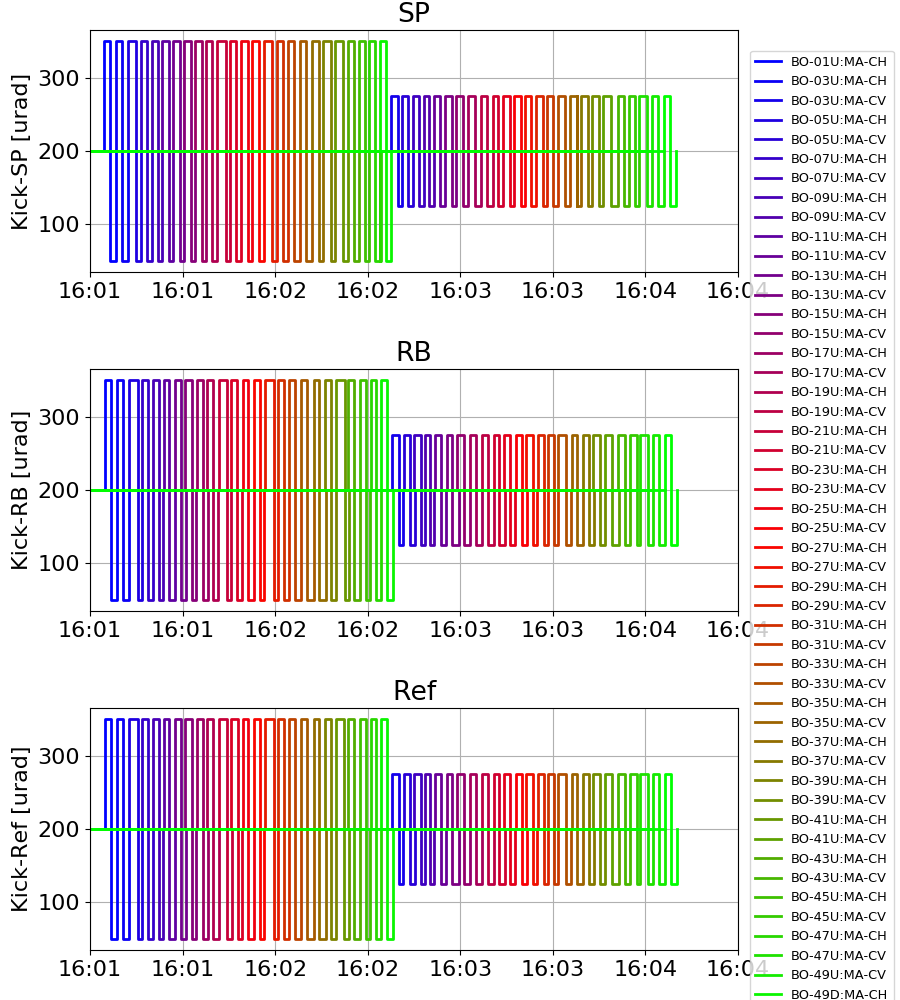

In [34]:
f  = plt.figure(figsize=(9, 10))
# f.autofmt_xdate()
gs = mpl_gs.GridSpec(3, 1)
gs.update(left=0.10, right=0.82, top=0.97, bottom=0.05, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[2, 0])

ini = datetime.datetime(2019, 10, 4, 16, 1, 0)
dlt = datetime.timedelta(minutes=3.5)
myFmt = mdates.DateFormatter('%H:%M')

infos = [
    {'title': 'SP', 'ylabel': 'Kick-SP [urad]'},
    {'title': 'RB', 'ylabel': 'Kick-RB [urad]'},
    {'title': 'Ref', 'ylabel': 'Kick-Ref [urad]'}, ]
datas = [sp_data, rb_data, ref_data]
axs = [ax1, ax2, ax3]

indcs = np.linspace(0, 1, len(sp_data))
cmap = cm.brg(indcs)
for ax, dta, info in zip(axs, datas, infos):
    for i, k in enumerate(sorted(dta)):
        x = [datetime.datetime.fromtimestamp(i) for i in dta[k]['x']]
        y = dta[k]['y']
        ax.step(x, y, where='post', color=cmap[i])
    ax.set_title(info['title'])
    ax.xaxis.set_major_formatter(myFmt)
    ax.grid(True)
    ax.set_xlim([ini, ini+dlt])
#     ax.set_xlabel('')
    ax.set_ylabel(info['ylabel'])
ax3.legend(sorted(sp_data), bbox_to_anchor=(1.25, 1.7), loc='center right', ncol=1, fontsize='xx-small')
f.show()